<a href="https://colab.research.google.com/github/DelightInLinght/Project/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d priyanka369/deepfake-cropped-frames

Dataset URL: https://www.kaggle.com/datasets/priyanka369/deepfake-cropped-frames
License(s): unknown
100% 491M/493M [00:29<00:00, 21.2MB/s]
100% 493M/493M [00:29<00:00, 17.3MB/s]


In [3]:
!unzip deepfake-cropped-frames.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/Dataset/Valid/Real/real-ymkojzsvxz.mp4/Frame60.jpg  
  inflating: content/Dataset/Valid/Real/real-ymkojzsvxz.mp4/Frame61.jpg  
  inflating: content/Dataset/Valid/Real/real-ymkojzsvxz.mp4/Frame62.jpg  
  inflating: content/Dataset/Valid/Real/real-ymkojzsvxz.mp4/Frame63.jpg  
  inflating: content/Dataset/Valid/Real/real-ymkojzsvxz.mp4/Frame64.jpg  
  inflating: content/Dataset/Valid/Real/real-ymkojzsvxz.mp4/Frame7.jpg  
  inflating: content/Dataset/Valid/Real/real-ymkojzsvxz.mp4/Frame8.jpg  
  inflating: content/Dataset/Valid/Real/real-ymkojzsvxz.mp4/Frame9.jpg  
  inflating: content/Dataset/Valid/Real/real-ymlpfhxujl.mp4/Frame1.jpg  
  inflating: content/Dataset/Valid/Real/real-ymlpfhxujl.mp4/Frame10.jpg  
  inflating: content/Dataset/Valid/Real/real-ymlpfhxujl.mp4/Frame11.jpg  
  inflating: content/Dataset/Valid/Real/real-ymlpfhxujl.mp4/Frame12.jpg  
  inflating: content/Dataset/Valid/Real/real-ymlpfhxujl.mp4/Frame

In [37]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation (optional) to improve generalization
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Prepare training and validation data generators
train_generator = train_datagen.flow_from_directory(
    r"/content/content/Dataset/Train",
    target_size=(150,150),  # Adjust for your model's input size
    batch_size=64,  # Experiment with batch size
    class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
    r"/content/content/Dataset/Valid",
    target_size=(150,150),
    batch_size=64,
    class_mode='binary'
)

Found 173760 images belonging to 2 classes.
Found 28736 images belonging to 2 classes.


In [38]:
from keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Add, Dropout
from keras.layers import Input, Dense, BatchNormalization
from keras.models import Model
from keras.applications import Xception

# Input Layer
input_layer = Input(shape=(150,150, 3))

# Inception Module
base_model = Xception(weights='imagenet', include_top=False, input_tensor=input_layer, classes=1)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)

# Model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Freeze the layers of the InceptionV3 base model
for layer in base_model.layers:
    layer.trainable = False


In [39]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 74, 74, 32)           864       ['input_10[0][0]']            
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 74, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 74, 74, 32)           0         ['block1_conv1_bn[0][0]'

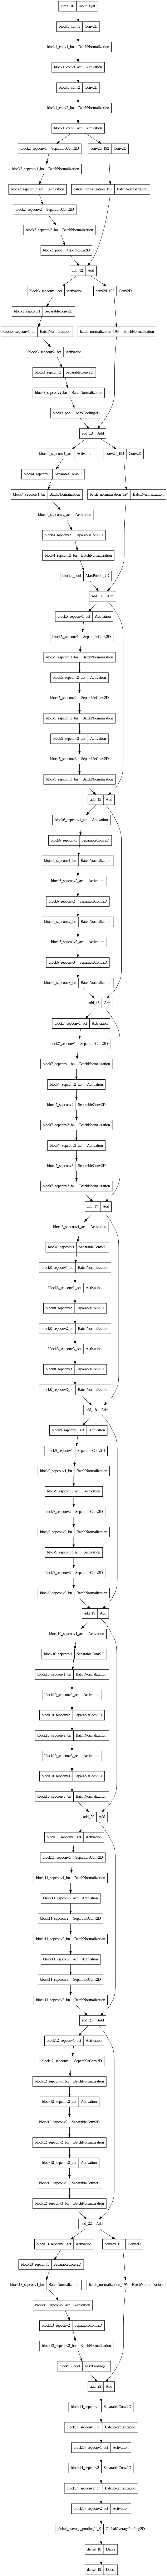

In [40]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', restore_best_weights=True)

# Train the model with early stopping
model.fit(
    train_generator,
    epochs=10,  # Adjust based on dataset size and validation performance
    validation_data=validation_generator,
    callbacks=[early_stopping]
)
model.save("Project.h5")

Epoch 1/10
2715/2715 [==============================] - 1491s 535ms/step - loss: 0.2411 - accuracy: 0.8925 - val_loss: 0.6205 - val_accuracy: 0.8443
Epoch 2/10
 211/2715 [=>............................] - ETA: 22:40 - loss: 0.1629 - accuracy: 0.9316

In [ ]:
#TinyConvNeXt (124,124,3); Epoch 1/10
# 2715/2715 [==============================] - 1253s 446ms/step - loss: 0.6890 - accuracy: 0.5551 - val_loss: 0.6907 - val_accuracy: 0.5390
#Epoch 2/10
# 2715/2715 [==============================] - 1253s 446ms/step - loss: 0.6790 - accuracy: 0.5651 - val_loss: 0.6807 - val_accuracy: 0.5090



# MobileNetV2 (224,224,3); Epoch 1/10
#2715/2715 [==============================] - 875s 310ms/step - loss: 0.2976 - accuracy: 0.8650 - val_loss: 2.8650 - val_accuracy: 0.5823
#Epoch 1/10
#2715/2715 [==============================] - 875s 310ms/step - loss: 0.2976 - accuracy: 0.8650 - val_loss: 2.8650 - val_accuracy: 0.5823
#Epoch 2/10
#2715/2715 [==============================] - 807s 297ms/step - loss: 0.1927 - accuracy: 0.9155 - val_loss: 1.2040 - val_accuracy: 0.7773
#Epoch 3/10
#2715/2715 [==============================] - 800s 295ms/step - loss: 0.1624 - accuracy: 0.9301 - val_loss: 1.3427 - val_accuracy: 0.7721

# InceptionV3 (299,299);Epoch 1/10
#2715/2715 [==============================] - 4576s 2s/step - loss: 0.3263 - accuracy: 0.8473 - val_loss: 0.8555 - val_accuracy: 0.7612
#Epoch 2/10
#21/2715 [..............................] - ETA: 1:09:37 - loss: 0.2232 - accuracy: 0.9025

# Xception  (150,150);Epoch 1/10
#2715/2715 [==============================] - 1491s 535ms/step - loss: 0.2411 - accuracy: 0.8925 - val_loss: 0.6205 - val_accuracy: 0.8443
#Epoch 2/10
#71/2715 [..............................] - ETA: 22:39 - loss: 0.1579 - accuracy: 0.9357


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=['accuracy']
)